In [2]:
from alexnet import AlexNet
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from tensorflow.python.framework import ops
from cnn_utils import *
import sklearn

%matplotlib inline

np.random.seed(1)
from _preprocess import *

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
features = tf.placeholder(tf.float32, (None, 227, 227, 3))
labels = tf.placeholder(tf.int64, None)
classes = 11

In [4]:
from sklearn.model_selection import train_test_split
X = np.load('X_train.npy')
y = np.load('y_train.npy')
y = y.reshape(len(y),1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)
y_val = y_val[:,0]

print(X_train.shape)
print(y_train.shape)
#X_val = np.load('X_val.npy')
#y_val = np.load('y_val.npy')
#print(len(X_val))

(9935, 227, 227, 3)
(9935, 1)


In [5]:
fc7 = AlexNet(features, feature_extract=True)
fc7 = tf.stop_gradient(fc7)
shape = (fc7.get_shape().as_list()[-1], classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = labels, logits = logits)
loss_op = tf.reduce_mean(cross_entropy)
opt = tf.train.AdamOptimizer(learning_rate = 0.009)
train_op = opt.minimize(loss_op, var_list=[fc8W, fc8b])
init_op = tf.global_variables_initializer()

preds = tf.argmax(logits, 1)
accuracy_op = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

Cost after epoch 0: 1.240895
Cost after epoch 5: 0.587724
Cost after epoch 10: 0.487160
Cost after epoch 15: 0.381039
Cost after epoch 20: 0.349336
Cost after epoch 25: 0.293343
Cost after epoch 30: 0.250785
Cost after epoch 35: 0.248001


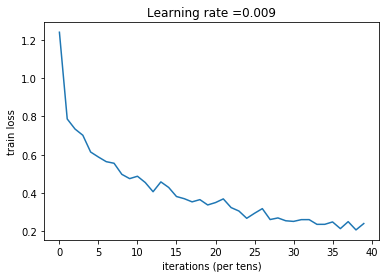

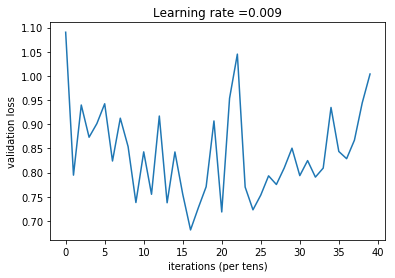

ResourceExhaustedError: OOM when allocating tensor with shape[9935,96,57,57] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 4, 4], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_142_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Conv2D', defined at:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-aecb144aea52>", line 1, in <module>
    fc7 = AlexNet(features, feature_extract=True)
  File "/home/ubuntu/Furniture-Classification/alexnet.py", line 38, in AlexNet
    conv1_in = conv(features, conv1W, conv1b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=1)
  File "/home/ubuntu/Furniture-Classification/alexnet.py", line 17, in conv
    conv = convolve(input, kernel)
  File "/home/ubuntu/Furniture-Classification/alexnet.py", line 14, in <lambda>
    convolve = lambda i, k: tf.nn.conv2d(i, k, [1, s_h, s_w, 1], padding=padding)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 956, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[9935,96,57,57] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 4, 4], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_142_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [6]:
#hyperparameter
epochs = 40
minibatch_size = 64
learning_rate = 0.009

#ops.reset_default_graph()                         
tf.set_random_seed(1)                         
seed = 3 

m = len(X_train)
train_loss = []
val_loss = []
#time = []


with tf.Session() as sess:
    sess.run(init_op)

    for epoch in range(epochs):
        
        #t0 = time.time()
        
        minibatch_loss = 0.
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        seed = seed + 1
        minibatches = random_mini_batches(X_train, y_train, minibatch_size, seed)
        #t0 = time.time()
        
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            minibatch_Y = minibatch_Y[:,0]
            _, loss = sess.run([train_op, loss_op], feed_dict={features: minibatch_X, labels: minibatch_Y})
            minibatch_loss += loss / num_minibatches

        batch_val_loss = sess.run([loss_op], feed_dict={features: X_val, labels: y_val})
        
        # Print the cost every epoch
        if epoch % 5 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_loss))
        if epoch % 1 == 0:
            train_loss.append(minibatch_loss)
            val_loss.append(batch_val_loss)
            #time_epoch = time.time() - t0
            #time.append(time_epoch)
            
    # plot the cost
    plt.plot(np.squeeze(train_loss))
    plt.ylabel('train loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    plt.plot(np.squeeze(val_loss))
    plt.ylabel('validation loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    #plt.plot(np.squeeze(time))
    #plt.ylabel('epoch time')
    #plt.xlabel('iterations (per tens)')
    #plt.title("Learning rate =" + str(learning_rate))
    #plt.show()
    
    # Calculate accuracy on the train, validaton and test set
    y_train = y_train[:,0]
    train_acc = sess.run(accuracy_op, feed_dict={features: X_train, labels: y_train})
    print("Train Accuracy:", train_acc)
    val_acc, preds = sess.run([accuracy_op, preds], feed_dict={features: X_val, labels: y_val})
    print("Validation Accuracy:", val_acc)
    print(preds[0:100])
    print(y_val[0:100])
            

In [1]:
with tf.Session() as sess:
    
    train_acc = sess.run(accuracy_op, feed_dict={features: X_train, labels: y_train})
    val_acc, preds = sess.run([accuracy_op, preds], feed_dict={features: X_val, labels: y_val})
    print("Train Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    print(preds[0:100])
    print(y_val[0:100])

NameError: name 'tf' is not defined

In [6]:
print(train_loss)

[1.1315136167310895, 0.7758613469139218, 0.7367775592111777, 0.7009075730077681, 0.6095668885015672, 0.5847561282496299, 0.5583173364400861, 0.5481822019623172, 0.4916528761386872, 0.4681059860414073, 0.48264005857129233, 0.4496013883621466, 0.40085595182834133, 0.45340786393611643, 0.4257999619168621, 0.3757126741832303, 0.36484885484941554, 0.34934132137606216, 0.3589145512350146, 0.33120555983435734, 0.34574812554544, 0.36306108082494426, 0.32033355928236446, 0.3012985568854117, 0.26288321013412164, 0.2902029386451167, 0.3144998025509621, 0.2575232209697846, 0.26571881852803686, 0.2520435083777673, 0.24824140143971285, 0.25733840133874664, 0.25624387038330865, 0.23325214506156983, 0.2321231080159064, 0.24743732343758307, 0.2110003254586651, 0.25006855428218844, 0.20356581658124928, 0.23866581854320323]
